## Master in Business Analytics &amp; Big Data - Master's thesis
### "Sales prediction and anomaly detection in times of COVID-19 using data from the stock market and the international press”

Full PDF can be read at this link:
<br>
https://www.linkedin.com/posts/sergio-carrasco-sanchez_final-masters-project-activity-6746471092820475904-YLCE

## Data loading and cleaning
### Sales data load

In [1]:
!pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 41.4 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


In [2]:
!pip install pandas

import pandas as pd

We proceed to load sales data from CSV file.

In [3]:
sales_data_df = pd.read_csv('./datasets/orders.csv')

In [4]:
sales_data_df

,id,date,user,payment_method,total,subtotal,discount,shipping_costs
0,1,2014-05-02 18:32:01,10614,bank_transfer,7.85,2.95,0.0,4.9
1,2,2014-05-02 19:01:55,10614,bank_transfer,8.19,3.29,0.0,4.9
2,3,2014-05-05 15:39:38,10615,cash_on_delivery,10.65,5.75,0.0,4.9
3,7,2014-05-12 14:48:47,10619,bank_transfer,7.39,2.49,0.0,4.9
4,8,2014-05-12 14:52:46,10619,cash_on_delivery,8.00,3.10,0.0,4.9
...,...,...,...,...,...,...,...,...
119375,128481,2020-10-31 21:16:04,68077,cash_on_delivery,13.25,8.35,0.0,4.9
119376,128482,2020-10-31 21:30:12,68078,cash_on_delivery,16.80,11.90,0.0,4.9
119377,128483,2020-10-31 22:00:58,41554,credit_card,52.86,47.96,0.0,4.9
119378,128484,2020-10-31 22:13:14,64540,paypal,23.25,18.35,0.0,4.9


We remove the least interesting columns.

In [5]:
sales_data_df = sales_data_df.drop(['id', 'user', 'payment_method', 'subtotal', 'discount', 'shipping_costs'], axis=1)

In [6]:
sales_data_df = sales_data_df.rename({'total': 'sales'}, axis=1)

In [7]:
sales_data_df

,date,sales
0,2014-05-02 18:32:01,7.85
1,2014-05-02 19:01:55,8.19
2,2014-05-05 15:39:38,10.65
3,2014-05-12 14:48:47,7.39
4,2014-05-12 14:52:46,8.00
...,...,...
119375,2020-10-31 21:16:04,13.25
119376,2020-10-31 21:30:12,16.80
119377,2020-10-31 22:00:58,52.86
119378,2020-10-31 22:13:14,23.25


We group the sales by day.

In [8]:
def daily_sales(data):
    data = data.copy()
    data.date = data.date.apply(lambda x: str(x)[:-9])
    data = data.groupby('date')['sales'].sum().reset_index()
    data.date = pd.to_datetime(data.date)
    return data

In [9]:
daily_sales_df = daily_sales(sales_data_df)

In [10]:
daily_sales_df

,date,sales
0,2014-05-02,16.04
1,2014-05-05,10.65
2,2014-05-12,53.54
3,2014-05-13,135.45
4,2014-05-15,144.89
...,...,...
2337,2020-10-27,4016.97
2338,2020-10-28,4641.49
2339,2020-10-29,3006.00
2340,2020-10-30,2181.25


In [11]:
daily_sales_df = daily_sales_df.set_index(daily_sales_df.date)

In [12]:
daily_sales_df = daily_sales_df.drop('date', axis=1)

In [13]:
daily_sales_df

,sales
date,
2014-05-02,16.04
2014-05-05,10.65
2014-05-12,53.54
2014-05-13,135.45
2014-05-15,144.89
...,...
2020-10-27,4016.97
2020-10-28,4641.49
2020-10-29,3006.00


### Nasdaq Composite Index Data Load

We import the  Composite index data from the same time period as the sales data.

In [14]:
!pip install yfinance

import yfinance as yf

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23909 sha256=4f38018d385a93ed2fd84ae2d7ee267eed437d59c3c1246bb11f1014077e4a4d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/8d/70/7b/987abb0c1e8a5b73008bdf47cbecd9df6dd145fa5f1ac27872
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=2f53778e9a8a190d9459433d983f1efe6a21a1da7cf08b5511ecd0eb93ab3574
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5e/8a/c4/59c699498647c7c94b14c87a904ca7540646107b3d94b7c320
Successfully built yfinance multitasking


In [15]:
min_date = min(daily_sales_df.index)
max_date = max(daily_sales_df.index)

In [16]:
min_date

Timestamp('2014-05-02 00:00:00')

In [17]:
max_date

Timestamp('2020-10-31 00:00:00')

In [18]:
ticker = '^IXIC'
ticker_name = 'NASDAQ Composite'

In [19]:
stock_data_df = yf.download(ticker, start=min_date, end=max_date)

[*********************100%***********************]  1 of 1 completed


In [20]:
stock_data_df.reset_index(inplace=True)

In [21]:
stock_data_df['Date'] = stock_data_df['Date'].dt.date

In [22]:
stock_data_df = stock_data_df.set_index(stock_data_df['Date'])

In [23]:
stock_data_df = stock_data_df.drop(['Date'], axis=1)

In [24]:
stock_data_df.index.name = 'date'

In [25]:
stock_data_df

,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2014-05-02,4138.629883,4145.060059,4115.890137,4123.899902,4123.899902,1844790000
2014-05-05,4099.250000,4138.339844,4086.350098,4138.060059,4138.060059,1561170000
2014-05-06,4128.220215,4132.459961,4080.760010,4080.760010,4080.760010,1850610000
2014-05-07,4085.489990,4091.030029,4021.050049,4067.669922,4067.669922,2486030000
2014-05-08,4053.280029,4109.200195,4039.909912,4051.500000,4051.500000,2411940000
...,...,...,...,...,...,...
2020-10-26,11440.639648,11545.629883,11221.059570,11358.940430,11358.940430,3186950000
2020-10-27,11409.339844,11465.059570,11361.860352,11431.349609,11431.349609,3079530000
2020-10-28,11230.900391,11249.950195,10999.070312,11004.870117,11004.870117,3912580000


We combine the sales data and the index data in the same dataframe.

In [26]:
daily_sales_df = pd.merge(left=daily_sales_df,
                          right=stock_data_df,
                          left_index=True,
                          right_index=True,
                          how='inner')

In [27]:
daily_sales_df = daily_sales_df.rename({'Open':'stock_open',
                                        'High':'stock_high',
                                        'Low':'stock_low',
                                        'Close':'stock_close',
                                        'Adj Close':'stock_adjclose',
                                        'Volume':'stock_volume'},
                                       axis=1)

In [28]:
daily_sales_df = daily_sales_df[['sales',
                                 'stock_open',
                                 'stock_high',
                                 'stock_low',
                                 'stock_close',
                                 'stock_adjclose',
                                 'stock_volume']]

In [29]:
daily_sales_df

,sales,stock_open,stock_high,stock_low,stock_close,stock_adjclose,stock_volume
date,,,,,,,
2014-05-02,16.04,4138.629883,4145.060059,4115.890137,4123.899902,4123.899902,1844790000
2014-05-05,10.65,4099.250000,4138.339844,4086.350098,4138.060059,4138.060059,1561170000
2014-05-12,53.54,4092.840088,4146.540039,4092.090088,4143.859863,4143.859863,1880020000
2014-05-13,135.45,4144.899902,4155.129883,4128.009766,4130.169922,4130.169922,1923480000
2014-05-15,144.89,4096.529785,4098.250000,4035.959961,4069.290039,4069.290039,2083030000
...,...,...,...,...,...,...,...
2020-10-26,4176.29,11440.639648,11545.629883,11221.059570,11358.940430,11358.940430,3186950000
2020-10-27,4016.97,11409.339844,11465.059570,11361.860352,11431.349609,11431.349609,3079530000
2020-10-28,4641.49,11230.900391,11249.950195,10999.070312,11004.870117,11004.870117,3912580000


### Loading data from the digital newspaper "The Economic Times"

In [30]:
!pip install requests
!pip install beautifulsoup4

import requests
from bs4 import BeautifulSoup
import time
import datetime
from dateutil import rrule
from calendar import monthrange
import csv

In [31]:
def read_url(year, month, starttime):
    url = f'https://economictimes.indiatimes.com/archivelist/year-{year},month-{month},starttime-{starttime}.cms'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')    
    return soup

In [32]:
def get_starttime(year, month, day):
    date1 = '1899-12-30'
    timestamp1 = time.mktime(datetime.datetime.strptime(date1, '%Y-%m-%d').timetuple())
    
    date2 = str(year) + '-' + str(month) + '-' + str(day)
    timestamp2 = time.mktime(datetime.datetime.strptime(date2, '%Y-%m-%d').timetuple())
    
    starttime = ((timestamp2 - timestamp1) / 86400)
    return str(starttime).replace(".0", "")

In [33]:
headlines_from = '2020-01-01'
headlines_to = '2020-10-31'

In [34]:
headlines_datetime_from = datetime.datetime.strptime(headlines_from, '%Y-%m-%d')
headlines_datetime_to = datetime.datetime.strptime(headlines_to, '%Y-%m-%d')

In [35]:
for dt in rrule.rrule(rrule.MONTHLY, dtstart=headlines_datetime_from, until=headlines_datetime_to):
    year = int(dt.strftime('%Y'))
    month = int(dt.strftime('%m'))
    
    for day in range(1, (monthrange(year, month)[1] + 1)):
        starttime = get_starttime(year, month, day)
        date_str_eng = str(year) + '-' + '{:02d}'.format(month) + '-' + '{:02d}'.format(day)
        
        # print(f'Date: {year}-{month}-{day}')
        
        headlines = []

        soup = read_url(year, month, starttime)

        for td in soup.findAll('td', {'class':'contentbox5'}):
            for headline in td.findAll('a'):
                if 'archive' not in headline.get('href'):
                    if len(headline.contents) > 0:
                        if headline.contents[0] not in headlines:
                            headlines.append(headline.contents[0])

        time.sleep(1)

        file = open(f'./datasets/economic_news_headlines_{date_str_eng}.csv', 'w')
        with file:
            write = csv.writer(file, escapechar='\\', quoting=csv.QUOTE_NONE)
            for item in headlines:
                write.writerow([item,])

We detect negative words found in economic news headlines.

In [36]:
!pip install stop-words

from stop_words import get_stop_words
import collections

  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32916 sha256=3305017b6a631e17857bb73630a368085e39fc689df15d88dcc58cf1e6b303d2
  Stored in directory: /home/ec2-user/.cache/pip/wheels/61/13/fb/bde87253355995b963f6355ca563a614453668bfc1b44fdc54
Successfully built stop-words


In [37]:
stop_words = get_stop_words('en')

In [38]:
banned_chars = ['\\', '`', '"', '*', '_', '{', '}', '[', ']', '(', ')', '>', '#',
                '+', ':', '-', '.', ',', '¿', '?', '¡', '!', '$', '\'', '«', '»', '|']

In [39]:
negative_economic_words = ['coronavirus', 'sars-cov-2', 'covid-19', 'covid19', 'virus', 'pandemic',
                           'lockdown', 'outbreak', 'curfew', 'quarantine', 'crisis', 'fears', 'violence',
                           'death', 'cases', 'fall', 'hit', 'impact']

In [40]:
number_common_words = 20

In [41]:
negative_economic_words_df = pd.DataFrame(columns=['date', 'negative_economic_words'])

In [42]:
date_from = '2020-01-01'
date_to = '2020-10-31'

In [43]:
for date in pd.date_range(date_from, date_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    
    # print(f'Date: {date_str_eng}')
    # print()
    
    file = open(f'./datasets/economic_news_headlines_{date_str_eng}.csv', 'rt')

    headlines = []
    
    with file:
        csv_reader = csv.reader(file, escapechar='\\')

        for line in csv_reader:
            headlines.append(line)
    
    word_count = {}
    
    for headline in headlines:
        for word in headline[0].lower().split():
            for ch in banned_chars:
                if ch in word:
                    word = word.replace(ch, '')

            if (word != '') & (word not in stop_words):
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
    
    negative_words_count = 0
    word_counter = collections.Counter(word_count)
    
    # print(f"Top {number_common_words} most common words:")
    # print()
    
    for word, count in word_counter.most_common(number_common_words):
        # print(f'{word}: {count}')

        if word in negative_economic_words:
            negative_words_count += count
    
    # print()
    # print(f"Negative words: {negative_words_count}")
    # print()
    
    negative_economic_words_df = negative_economic_words_df.append({'date':date,
                                                                    'negative_economic_words':negative_words_count},
                                                                   ignore_index=True)

In [44]:
negative_economic_words_df

,date,negative_economic_words
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
300,2020-10-27,12
301,2020-10-28,27
302,2020-10-29,0
303,2020-10-30,26


In [45]:
negative_economic_words_df.to_csv('./datasets/negative_economic_words.csv', index=False)

We create a word cloud with all the negative words extracted from the press headlines.

In [46]:
headlines = []

In [47]:
for date in pd.date_range(date_from, date_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    
    file = open(f'./datasets/economic_news_headlines_{date_str_eng}.csv', 'rt')

    with file:
        csv_reader = csv.reader(file, escapechar='\\')

        for line in csv_reader:
            headlines.append(line)

In [48]:
word_count = {}
negative_word_count = {}

for headline in headlines:
    for word in headline[0].lower().split():
        for ch in banned_chars:
            if ch in word:
                word = word.replace(ch, '')
        
        if (word != '') & (word not in stop_words):
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
            
            if word in negative_economic_words:
                if word not in negative_word_count:
                    negative_word_count[word] = 1
                else:
                    negative_word_count[word] += 1

In [49]:
number_common_words = 25

word_counter = collections.Counter(word_count)
negative_word_counter = collections.Counter(negative_word_count)

most_common_words = {}
most_common_negative_words = {}

for word, count in word_counter.most_common(number_common_words):
    most_common_words[word] = count

for word, count in negative_word_counter.most_common(number_common_words):
    most_common_negative_words[word] = count
    print(f'{word}: {count}')

covid19: 5305
coronavirus: 3830
lockdown: 2064
cases: 1453
hit: 1200
pandemic: 1065
virus: 981
impact: 846
fall: 762
crisis: 606
death: 575
outbreak: 384
fears: 322
quarantine: 257
violence: 214
curfew: 76


In [50]:
!pip install wordcloud
!pip install matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

     |████████████████████████████████| 366 kB 31.8 MB/s            


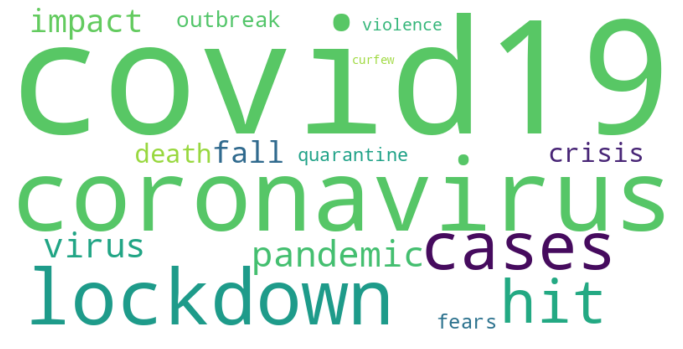

In [51]:
wc = WordCloud(background_color='white',
               max_font_size=256,
               random_state=42,
               width=800,
               height=400
              ).generate_from_frequencies(most_common_negative_words)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

We create the "negative_economic_words_df" dataframe that contains the number of negative words in the economic press from January to October 2020, and we join this data to the "daily_sales_df" dataframe that already contained the sales and Nasdaq Composite index values for the same period of time.

In [52]:
negative_economic_words_csv_df = pd.read_csv('./datasets/negative_economic_words.csv')

In [53]:
negative_economic_words_csv_df = negative_economic_words_csv_df.set_index(negative_economic_words_csv_df.date)

In [54]:
negative_economic_words_csv_df = negative_economic_words_csv_df.drop('date', axis=1)

In [55]:
negative_economic_words_df = pd.DataFrame(columns=['date'])

In [56]:
for date in pd.date_range(min_date, max_date, freq='d'):
    negative_economic_words_df = negative_economic_words_df.append({'date':date}, ignore_index=True)

In [57]:
negative_economic_words_df = negative_economic_words_df.set_index(negative_economic_words_df.date)

In [58]:
negative_economic_words_df = negative_economic_words_df.drop('date', axis=1)

In [59]:
negative_economic_words_df = pd.merge(left=negative_economic_words_df,
                                      right=negative_economic_words_csv_df[{'negative_economic_words'}],
                                      left_index=True,
                                      right_index=True,
                                      how='outer')

In [60]:
negative_economic_words_df = negative_economic_words_df.fillna(0)

In [61]:
negative_economic_words_df[{'negative_economic_words'}]

,negative_economic_words
date,
2014-05-02,0.0
2014-05-03,0.0
2014-05-04,0.0
2014-05-05,0.0
2014-05-06,0.0
...,...
2020-10-27,12.0
2020-10-28,27.0
2020-10-29,0.0


In [62]:
daily_sales_df

,sales,stock_open,stock_high,stock_low,stock_close,stock_adjclose,stock_volume
date,,,,,,,
2014-05-02,16.04,4138.629883,4145.060059,4115.890137,4123.899902,4123.899902,1844790000
2014-05-05,10.65,4099.250000,4138.339844,4086.350098,4138.060059,4138.060059,1561170000
2014-05-12,53.54,4092.840088,4146.540039,4092.090088,4143.859863,4143.859863,1880020000
2014-05-13,135.45,4144.899902,4155.129883,4128.009766,4130.169922,4130.169922,1923480000
2014-05-15,144.89,4096.529785,4098.250000,4035.959961,4069.290039,4069.290039,2083030000
...,...,...,...,...,...,...,...
2020-10-26,4176.29,11440.639648,11545.629883,11221.059570,11358.940430,11358.940430,3186950000
2020-10-27,4016.97,11409.339844,11465.059570,11361.860352,11431.349609,11431.349609,3079530000
2020-10-28,4641.49,11230.900391,11249.950195,10999.070312,11004.870117,11004.870117,3912580000


In [63]:
daily_sales_df = pd.merge(left=daily_sales_df,
                          right=negative_economic_words_df,
                          left_index=True,
                          right_index=True,
                          how='inner')

In [64]:
daily_sales_df

,sales,stock_open,stock_high,stock_low,stock_close,stock_adjclose,stock_volume,negative_economic_words
date,,,,,,,,
2014-05-02,16.04,4138.629883,4145.060059,4115.890137,4123.899902,4123.899902,1844790000,0.0
2014-05-05,10.65,4099.250000,4138.339844,4086.350098,4138.060059,4138.060059,1561170000,0.0
2014-05-12,53.54,4092.840088,4146.540039,4092.090088,4143.859863,4143.859863,1880020000,0.0
2014-05-13,135.45,4144.899902,4155.129883,4128.009766,4130.169922,4130.169922,1923480000,0.0
2014-05-15,144.89,4096.529785,4098.250000,4035.959961,4069.290039,4069.290039,2083030000,0.0
...,...,...,...,...,...,...,...,...
2020-10-26,4176.29,11440.639648,11545.629883,11221.059570,11358.940430,11358.940430,3186950000,14.0
2020-10-27,4016.97,11409.339844,11465.059570,11361.860352,11431.349609,11431.349609,3079530000,12.0
2020-10-28,4641.49,11230.900391,11249.950195,10999.070312,11004.870117,11004.870117,3912580000,27.0


We check the contrast between the values of the "sales" and "negative_economic_words" columns, mainly as of March 13.

In [65]:
daily_sales_df[(daily_sales_df.index >= '2020-03-01') & (daily_sales_df.index <= '2020-03-31')]

,sales,stock_open,stock_high,stock_low,stock_close,stock_adjclose,stock_volume,negative_economic_words
date,,,,,,,,
2020-03-02,3983.71,8667.139648,8952.809570,8543.349609,8952.169922,8952.169922,4232760000,44.0
2020-03-03,3447.97,8965.099609,9070.320312,8602.889648,8684.089844,8684.089844,4336700000,45.0
2020-03-04,4213.73,8834.099609,9019.959961,8757.660156,9018.089844,9018.089844,3602870000,60.0
2020-03-05,2616.82,8790.089844,8921.080078,8677.389648,8738.589844,8738.589844,3748090000,59.0
2020-03-06,1265.74,8469.019531,8612.360352,8375.129883,8575.620117,8575.620117,4279850000,40.0
2020-03-09,2952.63,7957.930176,8243.309570,7943.160156,7950.680176,7950.680176,4530350000,34.0
2020-03-10,3709.14,8219.759766,8347.400391,7930.430176,8344.250000,8344.250000,4431930000,29.0
2020-03-11,3652.05,8136.250000,8181.359863,7850.950195,7952.049805,7952.049805,4273890000,67.0
2020-03-12,1771.23,7398.580078,7712.330078,7194.669922,7201.799805,7201.799805,5066530000,119.0


## Loading data from the digital newspaper ABC.es

In [66]:
def read_url(date, page):
    url = f'https://www.abc.es/hemeroteca/dia-{date}/pagina-{page}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    html = soup.text
    contents = not("Sugerencias" in html)
    return contents, soup

In [67]:
headlines_from = '2020-01-01'
headlines_to = '2020-10-31'

In [68]:
headlines_timestamp_from = datetime.datetime.strptime(headlines_from, '%Y-%m-%d')
headlines_timestamp_to = datetime.datetime.strptime(headlines_to, '%Y-%m-%d')

In [69]:
for date in pd.date_range(headlines_timestamp_from, headlines_timestamp_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    date_str_spa = date.strftime('%d-%m-%Y')
    
    # print(f'Date: {date_str_eng}')
    # print()
    
    headlines = []
    page = 1
    
    contents, soup = read_url(date_str_spa, page)
    
    while contents:
        # print(f'Page: {page}')
        # print()
        for headline in soup.findAll('a', {'class':'titulo'}):
            # print(headline.contents[0])
            headlines.append(headline.contents[0])            
        time.sleep(1)
        page += 1
        contents, soup = read_url(date_str_spa, page)
        # print()
    
    file = open(f'./datasets/news_headlines_{date_str_eng}.csv', 'w')
    
    with file:
        write = csv.writer(file, escapechar='\\', quoting=csv.QUOTE_NONE)
        for item in headlines:
            write.writerow([item,])

KeyboardInterrupt: 

The "stop_words" and "banned_chars" lists are built with the words (in Spanish) and symbols to avoid, and "negative_words" with the most common negative words (in Spanish) to be counted.

In [70]:
stop_words = get_stop_words('es')

In [71]:
banned_chars = ['\\', '`', '"', '*', '_', '{', '}', '[', ']', '(', ')', '>', '#',
                '+', ':', '-', '.', ',', '¿', '?', '¡', '!', '$', '\'', '«', '»', '|']

In [72]:
negative_words = ['coronavirus', 'sars-cov-2', 'covid-19', 'covid19', 'crisis', 'recesión', 'quiebra', 'caída',
                  'erte', 'ertes', 'cierre', 'cierra', 'ruina', 'alarma', 'medidas', 'casos', 'cuarentena', 'confinamiento',
                  'colapso', 'contagios', 'pandemia', 'epidemia', 'muertos', 'muertes', 'muere', 'fallecidos']

In [73]:
number_common_words = 25

In [74]:
negative_words_df = pd.DataFrame(columns=['date', 'negative_words'])

In [75]:
date_from = '2020-01-01'
date_to = '2020-10-31'

In [77]:
for date in pd.date_range(date_from, date_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    
    # print(f'Date: {date_str_eng}')
    # print()
    
    file = open(f'./datasets/news_headlines_{date_str_eng}.csv', 'rt')

    headlines = []
    
    with file:
        csv_reader = csv.reader(file, escapechar='\\')

        for line in csv_reader:
            headlines.append(line)
    
    word_count = {}
    
    for headline in headlines:
        for word in headline[0].lower().split():
            for ch in banned_chars:
                if ch in word:
                    word = word.replace(ch, '')

            if (word != '') & (word not in stop_words):
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
    
    negative_words_count = 0
    word_counter = collections.Counter(word_count)
    
    # print(f"Top {number_common_words} most common words:")
    # print()
    
    for word, count in word_counter.most_common(number_common_words):
        # print(f'{word}: {count}')

        if word in negative_words:
            negative_words_count += count
    
    # print()
    # print(f"Negative words: {negative_words_count}")
    # print()
    
    negative_words_df = negative_words_df.append({'date':date, 'negative_words':negative_words_count}, ignore_index=True)

In [78]:
negative_words_df

,date,negative_words
0,2020-01-01,0
1,2020-01-02,13
2,2020-01-03,7
3,2020-01-04,0
4,2020-01-05,0
...,...,...
605,2020-10-27,51
606,2020-10-28,70
607,2020-10-29,91
608,2020-10-30,69


In [79]:
negative_words_df.to_csv('./datasets/negative_words.csv', index=False)

We make a word cloud with all the negative words extracted from the press headlines.

In [80]:
headlines = []

In [81]:
for date in pd.date_range(date_from, date_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    
    file = open(f'./datasets/news_headlines_{date_str_eng}.csv', 'rt')

    with file:
        csv_reader = csv.reader(file, escapechar='\\')

        for line in csv_reader:
            headlines.append(line)

In [82]:
word_count = {}
negative_word_count = {}

for headline in headlines:
    for word in headline[0].lower().split():
        for ch in banned_chars:
            if ch in word:
                word = word.replace(ch, '')

        if (word != '') & (word not in stop_words):
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
            
            if word in negative_words:
                if word not in negative_word_count:
                    negative_word_count[word] = 1
                else:
                    negative_word_count[word] += 1

In [83]:
number_common_words = 25

word_counter = collections.Counter(word_count)
negative_word_counter = collections.Counter(negative_word_count)

most_common_words = {}
most_common_negative_words = {}

for word, count in word_counter.most_common(number_common_words):
    most_common_words[word] = count

for word, count in negative_word_counter.most_common(number_common_words):
    most_common_negative_words[word] = count
    print(f'{word}: {count}')

coronavirus: 10362
covid19: 3121
casos: 1674
confinamiento: 1573
pandemia: 1511
alarma: 1346
crisis: 1324
muere: 1176
medidas: 1162
contagios: 1077
muertos: 933
fallecidos: 928
cuarentena: 752
cierre: 511
muertes: 462
cierra: 461
erte: 428
caída: 271
epidemia: 163
colapso: 101
ertes: 64
recesión: 47
ruina: 39
quiebra: 32


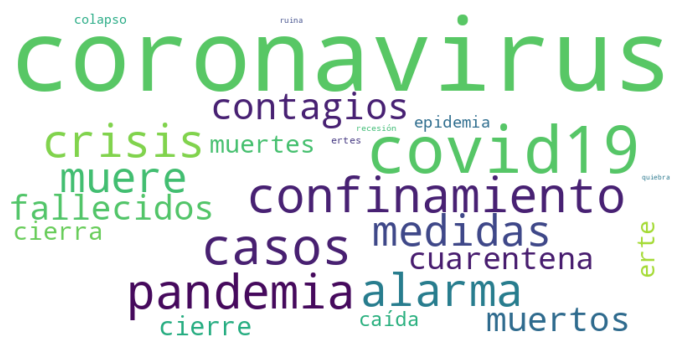

In [84]:
wc = WordCloud(background_color='white',
               max_font_size=256,
               random_state=42,
               width=800,
               height=400
              ).generate_from_frequencies(most_common_negative_words)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Finally, the "negative_words_df" dataframe is created that contains the number of negative words in the general press from January to October 2020, and this data is joined to the "daily_sales_df" dataframe that already contained the sales values, of the Nasdaq index. Composite and the number of negative words in the economic press for the same period of time.

In [85]:
negative_words_csv_df = pd.read_csv('./datasets/negative_words.csv')

In [86]:
negative_words_csv_df = negative_words_csv_df.set_index(negative_words_csv_df.date)

In [87]:
negative_words_csv_df = negative_words_csv_df.drop('date', axis=1)

In [88]:
negative_words_df = pd.DataFrame(columns=['date'])

In [89]:
for date in pd.date_range(min_date, max_date, freq='d'):
    negative_words_df = negative_words_df.append({'date':date}, ignore_index=True)

In [90]:
negative_words_df = negative_words_df.set_index(negative_words_df.date)

In [91]:
negative_words_df = negative_words_df.drop('date', axis=1)

In [92]:
negative_words_df = pd.merge(left=negative_words_df,
                             right=negative_words_csv_df[{'negative_words'}],
                             left_index=True,
                             right_index=True, how='outer')

In [93]:
negative_words_df = negative_words_df.fillna(0)

In [94]:
daily_sales_df = pd.merge(left=daily_sales_df,
                          right=negative_words_df[{'negative_words'}],
                          left_index=True,
                          right_index=True,
                          how='inner')

In [95]:
daily_sales_df

,sales,stock_open,stock_high,stock_low,stock_close,stock_adjclose,stock_volume,negative_economic_words,negative_words
date,,,,,,,,,
2014-05-02,16.04,4138.629883,4145.060059,4115.890137,4123.899902,4123.899902,1844790000,0.0,0.0
2014-05-05,10.65,4099.250000,4138.339844,4086.350098,4138.060059,4138.060059,1561170000,0.0,0.0
2014-05-12,53.54,4092.840088,4146.540039,4092.090088,4143.859863,4143.859863,1880020000,0.0,0.0
2014-05-13,135.45,4144.899902,4155.129883,4128.009766,4130.169922,4130.169922,1923480000,0.0,0.0
2014-05-15,144.89,4096.529785,4098.250000,4035.959961,4069.290039,4069.290039,2083030000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2020-10-28,4641.49,11230.900391,11249.950195,10999.070312,11004.870117,11004.870117,3912580000,27.0,70.0
2020-10-29,3006.00,11064.469727,11287.629883,11030.190430,11185.589844,11185.589844,3222460000,0.0,91.0
2020-10-29,3006.00,11064.469727,11287.629883,11030.190430,11185.589844,11185.589844,3222460000,0.0,91.0


We check the contrast between the values of the “sales” and “negative_words” columns, mainly as of March 12th.

In [96]:
daily_sales_df[(daily_sales_df.index >= '2020-03-01') & (daily_sales_df.index <= '2020-03-31')]

,sales,stock_open,stock_high,stock_low,stock_close,stock_adjclose,stock_volume,negative_economic_words,negative_words
date,,,,,,,,,
2020-03-02,3983.71,8667.139648,8952.809570,8543.349609,8952.169922,8952.169922,4232760000,44.0,56.0
2020-03-02,3983.71,8667.139648,8952.809570,8543.349609,8952.169922,8952.169922,4232760000,44.0,56.0
2020-03-03,3447.97,8965.099609,9070.320312,8602.889648,8684.089844,8684.089844,4336700000,45.0,30.0
2020-03-03,3447.97,8965.099609,9070.320312,8602.889648,8684.089844,8684.089844,4336700000,45.0,30.0
2020-03-04,4213.73,8834.099609,9019.959961,8757.660156,9018.089844,9018.089844,3602870000,60.0,81.0
2020-03-04,4213.73,8834.099609,9019.959961,8757.660156,9018.089844,9018.089844,3602870000,60.0,81.0
2020-03-05,2616.82,8790.089844,8921.080078,8677.389648,8738.589844,8738.589844,3748090000,59.0,89.0
2020-03-05,2616.82,8790.089844,8921.080078,8677.389648,8738.589844,8738.589844,3748090000,59.0,89.0
2020-03-06,1265.74,8469.019531,8612.360352,8375.129883,8575.620117,8575.620117,4279850000,40.0,99.0
